# Fixed Points

Recall that fixed points are points $p$ for which $f(p)=p$. A function $f:[a,b]\rightarrow [a,b]$ will always have a fixed point, and we can prove uniqueness of that fixed point, if the derivative $|f'(x)|\leq K<1$ on the interval $[a,b]$. If such is the case, we will have the estimate $|p_n-p|\leq |p_0-p|K^n$, where $p_0$ is some element of $[a,b]$, and $K$ is an upper bound on the first derivative on the interval.

## Example: Find a fixed point of $f(x)=1+.5\sin(x)$ on the interval [1.3,1.55], and tell how many iterations are required in order for the iterate $p_n$ to be within $10^{-8}$ of the fixed point $p$, given $p_0=1.3$.

First, we have that $f(1.3)=1.48$, $f(1.55)=1.49$. Additionally, the derivative of $f$ is $.5\cos(x)$, which is positive on $[1.3,1.55]$ (as $\pi/2=1.57$. Therefore, the function $f$ is increasing on the interval $[1.3,1.55]$, and it therefore maps the interval to itself. Additionally, the maximum value of the derivative is $.5$. We could use this as our $k$ value, or we could not that $\cos(x)$ is decreasing and positive on the interval, (as it decreases on $[0,\pi]$ and is positive on $[0,\pi/2]$), and hence the largest value of $|f'|$ on the interval is $|f'(1.3)|=.13$.

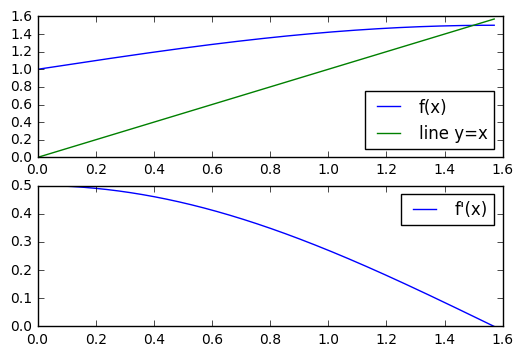

In [1]:
import numpy as np
from matplotlib import pyplot as plt
x=np.linspace(0,np.pi/2,1000)
y1=1+.5*np.sin(x)
y2=.5*np.cos(x)
fig,ax=plt.subplots(2)
ax[0].plot(x,y1,label='f(x)')
ax[0].plot(x,x,label='line y=x')
ax[0].legend(loc='best')
ax[1].plot(x,y2,label="f'(x)")
ax[1].legend()

plt.show()

The fixed point is the $x$ value for which the curves $f(x)$ and $y=x$ intersect.

Since we have satisfied the conditions of the theorem, we are guaranteed that the iterates converge.

$p_0=1.3$

$p_1=1+.5\cos(1.3)=1.4817790927085965$

$p_2=1+.5\cos(1.4817790927085965)=1.498020290806201$


Actual Value $ 1.49870113351785$.

In [4]:
def f(x):
    return 1+.5*np.sin(x)
error=1
x=1.3
iteration=0
while error>10**(-8):
    error=(abs(x-1.49870113351785))
    print('iteration: ',iteration,'value',x,'error',error)
    iteration=iteration+1
    x=f(x)


iteration:  0 value 1.3 error 0.1987011335178499
iteration:  1 value 1.48177909271 error 0.0169220408093
iteration:  2 value 1.49802029081 error 0.000680842711649
iteration:  3 value 1.49867649645 error 2.46370716892e-05
iteration:  4 value 1.49870024603 error 8.87489421286e-07
iteration:  5 value 1.49870110155 error 3.19643518321e-08
iteration:  6 value 1.49870113237 error 1.15124199063e-09


Here we took 6 iterations to get to the required accuracy. Using the the error equation, we have $|p_n-p|\leq K^n|p_0-p|\leq K^n|1.55-1.3|=(.13)^n(.25)$. The first $n$ for which this is less than $10^{-8}$ is $9$. Thus, this error equation tells us that it will take at most $9$ iterations to converge to the desired accuracy, $3$ more than what was actually necessary.

# Special Cases: 

In the case where the first derivative of the function at the fixed point is $0$, we actually obtain quadratic convergence. 

## Example: suppose that $f(x)=x^2$, and consider the interval $[-1/4,1/4]$. Find the number of iterations required to converge to the fixed point $0$, if $p_0=1/4$, within $10^{-8}$, using fixed point iteration.


Note that $f:[-1/4,1/4]\rightarrow [-1/4,1/4]$, and $|f'(x)|=|2x|\leq 1/2$ on the interval $[-1/4,1/4]$, so we know we will converge to a unique fixed point using fixed point iteration. We can let $K=1/2$, as this is an upper bound on the first derivative. The equation gives

$|p_n-0|=|p_n|\leq (1/2)^n(1/4-0)=1/2^{n+2}$

Note in this case, since we actually know the fixed point, we don't have to estimate $|p_0-p|$ using the entire width of the interval, which decreases the number of iterations the formula will require. Choosing $n=26$, we see that at most $26$ iterations would be required to give convergence to within the error margin.

In this case, the derivative is $0$ at the fixed point, therefore, we can actually expect quadratic convergence.

In [5]:
def f(x):
    return x**2
error=1
x=.25
iteration=0
while error>10**(-8):
    error=(abs(x))
    print('iteration: ',iteration,'value',x,'error',error)
    iteration=iteration+1
    x=f(x)


iteration:  0 value 0.25 error 0.25
iteration:  1 value 0.0625 error 0.0625
iteration:  2 value 0.00390625 error 0.00390625
iteration:  3 value 1.52587890625e-05 error 1.52587890625e-05
iteration:  4 value 2.3283064365386963e-10 error 2.3283064365386963e-10


In fact, it only took 4 iterations to determine the fixed point to within $10^{-8}$. 

# Modified Newtons Method

If a function $f$ has a root of order n at a point $p$, that is $f^{i}(p)=0, 0\leq i<n$, and $f^n(p)\neq 0$, Newton's method may not give quadratic convergence as expected. Sometimes we can modify Newton's method slightly, by letting $u(x)=\frac{f(x)}{f'(x)}$, (which has the property that $\lim_{x\rightarrow p}u(x)=0$). Applying Newton's method to $u(x)$ can lead to convergence to the root of $f$, because it is also a "root" of $u$.

## Example: Let $f(x)=\sin^2(x)$, so that $p=0$, and let $p_0=.5$.

Here we have a root of order 2 at $0$, so taking $u(x)=\frac{\sin^2(x)}{2\sin(x)\cos(x)}=1/2\tan(x)$, we have that $u(x)/u'(x)$ is $\frac{.5\tan(x)}{.5\sec^2(x)}=\sin(x)\cos(x)$. Applying Newton's method to this function, we will hopefully converge to the root of $f$(specifically the root at $0$).

In [7]:
def f(x):
    return x-np.sin(x)*np.cos(x)
error=1
x=.5
iteration=0
while iteration<6:
    error=(abs(x))
    print('iteration: ',iteration,'value',x,'error',error)
    iteration=iteration+1
    x=f(x)

iteration:  0 value 0.5 error 0.5
iteration:  1 value 0.0792645075961 error 0.0792645075961
iteration:  2 value 0.000331588377988 error 0.000331588377988
iteration:  3 value 2.43056159509e-11 error 2.43056159509e-11
iteration:  4 value 0.0 error 0.0
iteration:  5 value 0.0 error 0.0


Within $4$ iterations, the computer can no longer distinguish the iterate from $0$.